# Computational Thinking WS2023/24 - Abgabe
**Autoren:** 
+ Dr. Benedikt Zönnchen
+ Prof. Martin Hobelsberger
+ Prof. Martin Orehek
+ Prof. Benedikt Dietrich

**Anmerkungen:**

In diesem Notebook werden wir uns Stück für Stück einen Kontext erbauen, um mit Daten besser und bequemer umgehen zu können.
Dabei verzichten wir auf Pakete wie

+ ``numpy``
+ ``pandas``

und starten stattdessen von Neuem. Für den letzten Teil dieses Notebooks müssen aber beide Pakete installiert sein.

### CSV-Dateien

Ein gängiges Format, um Daten zu speichern sind sogenannte CSV-Dateien, wobei CSV für *Comma-Separated Values* steht. In diesen Dateien enthält typischerweise die erste Zeile die Namen der Spalten, durch Kommas getrennt. Alle weiteren Zeilen enthalten die Daten, wiederum jeweils durch Kommas getrennt. Ein Beispiel einer Datei, in welcher Namen, Matrikelnummer, die erzielten Punkte und Noten von Studierenden abgespeichert werden, könnte wie folgt aussehen:

``` 
Matrikelnummer,Name,Vorname,Punkte,Note
12345678,Müller,Hans,79,2.3
44445555,Musterfrau,Maria,99,1.0
...
```

Der Name der ersten Spalte lautet in diesem Beispiel `Matrikelnummer`, der Name der zweiten Spalte `Name`, usw.. 
Der Student Hans Müller mit der Matrikelnummer 12345678 hat 79 Punkte erzielt, was der Note 2.3 entspricht.

In den folgenden Aufgaben wollen wir unsere eigene Datenstruktur konstruieren, welche eine CSV-Datei repräsentieren soll. Diese Datenstruktur ``data`` ist ein Dictionary, welches lauter Listen enthält.
Jede Liste repräsentiert eine Spalte der CSV-Datei.
Die ``keys`` des Dictionarys repräsentieren den Spaltennamen.

Die Aufgaben bauen teilweise aufeinander auf.
Es ist insbesondere wichtig, dass Sie **Aufgabe 1**, **Aufgabe 2** und **Aufgabe 3** zuerst lösen, da Sie damit die angesprochene Datenstruktur erzeugen.

In [1]:
import otter
import csv

grader = otter.Notebook('09_abgabe2.ipynb')

path_to_csv_file = './data/test-data.csv'

Folgender Code gibt die ersten ``n`` Zeilen der CSV-Datei ``./data/test-data.csv`` aus.
Dabei verwenden wir aus dem Standardpaket ``csv`` die Funktion ``reader``, welche einen neuen sog. Handle erzeugt, mithilfe dem wir durch die CSV-Datei *iterieren* können.

***Hinweis:*** Debuggen Sie, bevor sie weitermachen, unbedingt folgenden Code Zeile für Zeile und stellen Sie sicher, dass sie verstehen, welche Werte welche Variable bei den einzelnen Durchläufen annehmen. 

In [2]:
n = 5
with open(path_to_csv_file, newline='') as csvfile:
    handle = csv.reader(csvfile, delimiter=',')
    count = 1
    for row in handle:
        if count >= n:
            break
        row_as_string = ''
        print(f"Zeile {count}: ")
        for col in row:
            print(col)
        print("")
        count += 1


Zeile 1: 
x
y
name
price

Zeile 2: 
1.0
2.0
Toster
5

Zeile 3: 
2.3
21
Auto
9



***
***Aufgabe 1 (Lesen einer Spalte).***

Schreiben Sie eine Funktion ``read_column(name, path_to_csv_file)``, welche Ihnen die Werte der Spalte mit dem Namen (Header) ``name`` als Liste zurückliefert.
``path_to_csv_file`` ist der Dateipfad zur jeweiligen CSV-Datei.

Angenommen die CSV-Datei sähe wie folgt aus:

```
x,y,name,price
1.0,2.0,Toster,5
2.3,21,Auto,9
```

dann sollte 

```python
read_column('y', './data/test-data.csv')
```

folgendes zurückliefern:

```python
['2.0', '21']
```

Gehen Sie bei Ihrer Lösung wie folgt vor:

1. Überlegen Sie sich als erstes, wie sie herausfinden können, welche die gesuchte Spalte ist. 
1. Schreiben Sie eine Funktion `read_column(name, path_to_csv_file)`, welche den Index der Spalte mit dem Namen `name` ermittelt und ausgibt. Für einen Aufruf `read_column('y', './data/test-data.csv')` sollte die Funktion also `1`, für `read_column('y', './data/test-data.csv')` die `3` ausgeben.
1. Erweitern Sie nun den Code, sodass Daten der gesuchten Spalte ausgegeben werden, also z.B. `'2.0'` und `'21'` wenn die Funktion mit `read_column('y', './data/test-data.csv')` aufgerufen wird.
1. Erweitern Sie nun Ihren Code und erzeugen zu Beginn der Funktion eine leere Liste `data`. Fügen Sie alle Daten aus der gesuchten Spalte zur Liste hinzu. Die Funktion soll `data` zurückliefern.
1. Erweitern Sie Ihre Funktion nun noch um eine Fehlerbehandlung: Sollte der gesuchte Namen nicht Teil der Daten sein, soll eine Liste zurückgegeben werden.

**Hinweis 1:** Beachten Sie, dass die eingelesenen Daten alle Strings zurückgeliefert werden. Wir werden uns diesem Problem weiter unten annehmen.

**Hinweis 2:** Bedenken Sie, dass die erste Zeile, welche Sie einlesen, sich von allen anderen Zeilen unterscheidet, da es sich um die Namen der Spalten handelt!

In [19]:
def read_column(name, path_to_csv_file):
    data = []
    with open(path_to_csv_file, newline='') as csvfile:
        handle = csv.reader(csvfile, delimiter=',')
        for col in handle:
            if handle.line_num == 1:
                try:
                    col_index = col.index(name)
                except:
                    print("Keine Spalte mit dem Namen vorhanden.")
                    break
            else:
                data.append(col[col_index])
        return data
    
    
print(read_column('y', path_to_csv_file))
print(read_column('price', path_to_csv_file))

['2.0', '21']
['5', '9']


In [20]:
grader.check("q1")

Keine Spalte mit dem Namen vorhanden.


q1 results: All test cases passed!
q1 - 1 message: Das sieht gut aus.

### Einschub - Funktionen als Referenz

In Python ist es möglich, einer Funktion eine Funktion als Parameter zu übergeben. Hier ein kleiner Beispielcode:

In [21]:
def multiply(a, b):
    return a * b

def add(a, b):
    return a + b

def do_math(function_name, operand1, operand2):
    result = function_name(operand1, operand2)
    return result

result1 = do_math(multiply, 2, 3)
result2 = do_math(add, 2, 3)

print(f"{result1=}")
print(f"{result2=}")

result1=6
result2=5


***
***Aufgabe 2 (Erweiterung mit Parser).***

Mit der Möglichkeit Funktionen als Parameter zu übergeben erreicht man, dass eine Funktion eine Funktion unserer Wahl aufruft. Das ist für unseren Spaltenleser `read_colum` besonders praktisch, da man so Daten direkt beim Einlesen vorverarbeiten kann.

In der folgenden Aufgabe sollen Sie die oben definierte Funktion `read_column` noch um den optionalen Parameter `parser` erweitern. Übergibt man für ``parser`` eine Funktion, soll diese Funktion für alle Daten der Spalte angewendet werden.

***Beispiel 1:***

Der Code 

```python
    def to_int(value):
        return int(value)

    read_column(['price'], './data/test-data.csv', to_int)
```

soll folgendes zurückliefern:

```python
    [5, 9]
```

***Beispiel 2:***

Der Code 

```python
    def multiply_by_two(value):
        return int(value) * 2 # Achtung: Beachten Sie die Konvertierung in int!

    read_column(['price'], './data/test-data.csv', multiply_by_two)
```

soll folgendes zurückliefern:

```python
    [10, 18]
```

***Beispiel 3:***

Wird `read_column` nur mit zwei Parametern aufgerufen, soll `parser` den Default-Wert `None` haben. In diesem Fall soll der Wert der Spalte unverändert zurückgegeben werden.

Der Aufruf

```python
    read_column(['price'], './data/test-data.csv')
```

soll also folgendes zurückliefern:

```python
    ['5', '9']
```

In [85]:
# def to_int(value):
#     try:
#         return int(value)
#     except:
#         print("Kein Int")
#         return value


def read_column(name, path_to_csv_file, parser=None):
    data = []
    with open(path_to_csv_file, newline='') as csvfile:
        handle = csv.reader(csvfile, delimiter=',')
        for col in handle:
            if handle.line_num == 1:
                try:
                    col_index = col.index(name)
                except:
                    print("Keine Spalte mit dem Namen vorhanden.")
                    break
            else:
                if parser != None:
                    data.append(parser(col[col_index]))
                else:
                    data.append(col[col_index])
        return data

read_column('y', './data/test-data.csv')

['2.0', '21']

***Aufgabe 3 (Erzeugen eines Dictionaries aus der CSV-Datei).*** 

Schreiben Sie eine Funktion ``read(names, path_to_csv_file, parsers=None)``, welche Ihnen die Spalten, definiert in ``names``, in ein Dictionary steckt.
Dabei sollen die ``keys`` des Dictionarys aus den Namen ``names`` bestehen und die ``values`` des Dictionarys aus den Spalten (als Listen) bestehen.
Die Funktion soll das konstruierte Dictionary zurückliefern.

Mit Hilfe des Parameters `parsers` soll eine Liste an `parser` übergeben werden können.
Gibt es für den ``i``-ten Namen einen Parser ``parsers[i]``, d.h. entspricht der Wert von `parsers[i]` nicht `None`, so sollte jeder Wert ``value`` der entsprechenden Spalte durch den Wert ``parser[i](value)`` ersetzt werden.


***Beispiele***

Für folgende CSV-Datei

```
x,y,name,price
1.0,2.0,Toster,5
2.3,21,Auto,9
```

ergibt

```python
data = read(['y', 'x'], path_to_csv_file)
print(data)
```

folgende Ausgabe

```python
{'y': ['2.0','21'], 'x': ['1.0','2.3']}
```

und

```python

def multiply_by_two(x):
    return 2*x

data = read(['price', 'x'], path_to_csv_file, [multiply_by_two, None])
print(data)
```

führt zu folgender Ausgabe

```python
{'price': [10.0,18.0], 'x': [1.0,2.3]}
```

**Tipp 1:** Sie können (müssen aber nicht) Ihre Funktion ``read_column`` verwenden.

**Tipp 2:** Setzen Sie die Funktion erst Mal ohne `parsers` um. Wenn das normale Einlesen der Spalten in das Dictionary funktioniert, erweitern Sie Ihren Code um die Funktionalität `parsers`.

In [51]:
def read(names, path_to_csv_file, parsers=None):
    data_dict = {}
    
    for element in names:
        try:
            pars_func = parsers[names.index(element)]
            #print(pars_func)
        except:
            pars_func = None

        data_dict[element] = read_column(element, path_to_csv_file, pars_func)
        
    return data_dict



def multiply_by_two(x):
    return 2*int(x)

data = read(['y', 'x'], path_to_csv_file)
print(data)

table = read(['price', 'x'], path_to_csv_file, [multiply_by_two, None])
print(table)

{'y': ['2.0', '21'], 'x': ['1.0', '2.3']}
{'price': [10, 18], 'x': ['1.0', '2.3']}


In [52]:
grader.check("q3")

q3 results: All test cases passed!
q3 - 1 message: Das sieht gut aus.

Wir können eine CSV-Datei nun bequem in eine Python-Datenstruktur einlesen.
Diese Datenstruktur bezeichnen wir von nun an als ``data``.

***Aufgabe 4 (Anzahl der Zeilen).*** 

Schreiben Sie eine Funktion ``len_data(data)``, welche die Anzahl der Zeilen von ``data`` zurückliefert.

Der Code 

```python
print(len_data(read(['y'], './data/test-data.csv')))
```

sollte beispielsweise 

``2`` 

zurückliefern. 

Existiert der key nicht, oder ist die Liste leer, soll die Funktion ``0`` zurückliefern.

In [72]:
def len_data(data):
    try:
        for element in data:
            if len(data[element]) != 0:
                return len(data[element])
    except:
        return 0
    return 0

o = {}
print(len_data(read(['y'], path_to_csv_file)))
print(len_data(o))

2
0


In [71]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 1 message: Das sieht gut aus.

***Aufgabe 5 (Spaltennamen).*** 

Schreiben Sie eine Funktion ``get_names(data)``, welche eine Liste mit allen Spaltennamen unserer Datenstruktur ``data`` zurückliefert.

Beispielsweise sollte:

```python
get_names({'x': [1,2], 'name': ['Anna', 'Klaus']})
```

``['x', 'name']`` oder ``['name', 'x']`` ausgeben.

In [75]:
def get_names(data):
    namelist = []
    for element in data:
        namelist.append(element)
    return namelist

get_names(read(['y', 'price'], path_to_csv_file))

['y', 'price']

In [76]:
grader.check("q5")

q5 results: All test cases passed!
q5 - 1 message: Das sieht gut aus.

***Aufgabe 6 (Zeilen auswählen).*** 

Schreiben Sie eine Funktion ``get_row(data, i)``, welche ein Dictionary zurückliefert, wobei die ``keys`` die Spaltennamen unserer Datenstruktur ``data`` sind und die ``values`` der ``i``-te Wert der dazugehörenden Spalte ist.

Beispielsweise sollte

```python
my_data = {'x': [1,2,3], 
           'name': ['Anna', 'Klaus','Nina']
           }
get_row(my_data, 1)
```

``{'x': 2, 'name': 'Klaus'}`` ausgeben.

Ist ``i`` außerhalb des gültigen Wertebereichs (für das gegebene Beispiel wäre das für `i > 2` der Fall), soll die Funktion ein leeres Dictionary zurückliefern. 

In [83]:
def get_row(data, i):
    rows_dict = {}

    for element in data:
        try:
            rows_dict[element] = data[element][i]
        except:
            pass

    return rows_dict



get_row({'x': [1,2,3], 'name': ['Anna', 'Klaus','Nina']}, 1)

{'x': 2, 'name': 'Klaus'}

In [82]:
grader.check("q6")

q6 results: All test cases passed!
q6 - 1 message: Das sieht gut aus.

<!-- BEGIN QUESTION -->

***
***Aufgabe 7 (Zeilen filtern).***

Beschreiben Sie welche Auswirkungen folgende Funktion `filter_data()` hat.

In [84]:
def keep_all(x):
    return True

def price_is_less_than_nine(x):
    return True if x['price'] < 9 else False

def filter_data(data, predicate = keep_all):
    copy = {name: [] for name in get_names(data)}
    for i in range(len_data(data)):
        row = get_row(data, i)
        if predicate(row):
            for name in row:
                copy[name].append(row[name])
    return copy

data = {'price': [5, 32, 7, 11], 'name': ['Tasse', 'Stuhl', 'Block', 'Koffer']}
filter_data(data, price_is_less_than_nine)

{'price': [5, 7], 'name': ['Tasse', 'Block']}

________________________________________________________________________________________________________________________________________________________________________
Die Funktion "filter_data" nimmt als Argumente ein Dictionary entgegen und ein Prädikat, das per default auf "keep all" gesetzt ist, was für jeden Input "True" zurückliefert.

Zuerst wird mit "copy" ein neues Dictionary initialisiert, das als keys die keys des input-Dictionarys enthält und als values jeweils eine leere Liste.

Dann wird len_data-mal (also so oft, wie viele Zeilen in Data vorhanden sind) folgendes ausgeführt:
- der Variable "row" wird ein Dictionary zugewiesen, dass die Key-Value-Paare der i-ten Zeile von data enthält
- es wird auf row das Prädikat angewandt. Bei dem Aufruf ist das Prädikat "price_is_less_than_nine" gesetzt, welches in dem dictionary, das mit "row" initialisiert ist überprüft, ob der value unter dem key "price" kleiner als 9 ist (Achtung, ohne Garantie, dass an der Stelle ein int oder float hinterlegt ist)
- wenn das Präfikat "True" zurückgibt (also in dem Fall: Preis kleiner 9), wird durch das dictionary, das mit "row" initialisiert ist iteriert und der jeweilige key als key im "copy"-dicionary übernommen und die jeweiligen values aus dem "row"-dict werden als values in die leeren Listen beim jeweiligen key in copy eingefügt
- das "copy"-dict wird returned

Im Endeffekt werden zeilenweise die Namen und Preise jener Gegenstände aus Data returned, deren Preis unter 9 ist.
________________________________________________________________________________________________________________________________________________________________________

<!-- END QUESTION -->

***Aufgabe 8 (Spalten aggregieren).*** 

Um Daten zu analysieren wollen wir verschiedene Operationen über Spalten durchführen, welche ausschließlich numerische Werte enthalten.
Jede dieser Operationen liefert genau einen numerischen Wert zurück.

Schreiben Sie folgende Funktionen:

+ ``avg_col(data, col_name)``: gibt den Durchschnittswert der Spalteneinträge mit dem Namen ``name`` zurück
+ ``sum_col(data, col_name)``: gibt die Summe aller Spalteneinträge mit dem Namen ``name`` zurück
+ ``max_col(data, col_name)``:  gibt den größten Wert der Spalteneinträge mit dem Namen ``name`` zurück
+ ``min_col(data, col_name)``:  gibt den kleinsten Wert der Spalteneinträge mit dem Namen ``name`` zurück

**Empfehlung:** Verzichten Sie bei Ihrer Implementierung auf die Verwendung der ``Python``-Built-in Funktionen ``sum``, ``max``, ``min``. Dadurch lernen Sie bei der Umsetzung der Aufgabe deutlich mehr.

In [97]:
def avg_col(data, col_name):
    sum = 0
    length = len(data[col_name])
    for element in data[col_name]:
        try:
            sum += int(element)
        except:
            print(f"Wert {element} nicht numerisch.")
            length -=1
            continue
    return sum/length


def sum_col(data, col_name):
    sum = 0
    for element in data[col_name]:
        try:
            sum += int(element)
        except:
            print(f"Wert {element} nicht numerisch.")
            continue
    return sum


def max_col(data, col_name):
    max_element = 0
    for element in data[col_name]:
        try:
            int_val = int(element)
            if int_val > max_element:
                max_element = int_val 
        except:
            print(f"Wert {element} nicht numerisch.")
            continue
    return max_element


def min_col(data, col_name):
    min_element = int(data[col_name][0])
    for element in data[col_name]:
        try:
            int_val = int(element)
            if int_val < min_element:
                min_element = int_val 
        except:
            print(f"Wert {element} nicht numerisch.")
            continue
    return min_element


data = {'price': [5, 32, 7, 11], 'name': ['Tasse', 'Stuhl', 'Block', 'Koffer']}
print(sum_col(data, 'price'))
print(avg_col(data, 'price'))
print(max_col(data, 'price'))
print(min_col(data, 'price'))

55
13.75
32
5


In [98]:
grader.check("q8")

q8 results: All test cases passed!
q8 - 1 message: Das sieht gut aus.
q8 - 2 message: Das sieht gut aus.
q8 - 3 message: Das sieht gut aus.
q8 - 4 message: Das sieht gut aus.

***Aufgabe 9 (Datenverarbeitung)***.

Nun wollen wir die geschriebenen Funktionen nutzen, um einen einfachen Datensatz zu verarbeiten. Gegeben ist ein von ChatGPT erzeugter Datensatz `./data/exam_results.csv`. Dieser beinhaltet Name, ID und erreichte Punkte von Studierenden in einer Prüfung. 

Werten Sie die Daten mit Hilfe der geschriebenen Funktionen wie folgt aus:

1. Bestimmen Sie die durchschnittlich erreichte Punktezahl und geben diese aus.
1. Bestimmen Sie die minimal erreichte Punktezahl und geben diese aus.
1. Bestimmen Sie die maximal erreichte Punktezahl und geben diese aus.
1. Berechnen Sie für alle Student:innen die Note. Schreiben Sie hierfür eine Funktion `points_to_grade(points)`, welche folgendes Bewertungsschema umsetzt und für eine (!) übergebene Punktezahl die zugehörige Note zurückliefert:

    | von einschließlich | bis einschließlich | Note |
    |--------------------|--------------------|------|
    | 0                  | 49                 | 5.0  |
    | 50                 | 62                 | 4.0  |
    | 63                 | 75                 | 3.0  |
    | 76                 | 89                 | 2.0  |
    | 90                 | 100                | 1.0  |



1. Ermitteln Sie die Durchschnittsnote der Prüfung.
1. Ermitteln Sie die Häufigkeit jeder einzelnen Noten, d.h. wie oft gab es eine 1.0, wie oft eine 2.0, usw.

Das Ergebnis Ihrer Auswertesoftware könnte z.B. wie folgt aussehen:

```
Die durchschnittlich erreichte Punktezahl beträgt: 81.05
Die minimal erreichte Punktezahl beträgt: 59
Die maximal erreichte Punktezahl beträgt: 100

Die durchschnittlich erreichte Note beträgt: 2.10

Häufigkeiten der einzelnen Noten:
1.0: 21
2.0: 30
3.0: 23
4.0: 3
5.0: 0
```

In [156]:
def point_statistics(path, col_name='Points'):
    print("Die durchschnittliche Punktezahl:", avg_col(read([col_name], path), col_name))
    print("Die minimal erreichte Punktezahl:", min_col(read([col_name], path), col_name))
    print("Die maximal erreichte Punktezahl:", max_col(read([col_name], path), col_name))

def points_to_grade(points):
    try:
        x = int(points)
    except:
        print(f"{points} ist keine valide Punktzahl.")
        return
    if x <= 49:
        return 5.0
    elif x <= 62:
        return 4.0
    elif x <= 75:
        return 3.0
    elif x <= 89:
        return 2.0
    elif x<=100:
        return 1.0


def avg_grade(path, col_name='Points'):
    grades = {}
    grades['Grades'] = read_column(col_name, path, points_to_grade)
    print("Die durchschnittliche Note:", avg_col(grades, 'Grades'))
    return grades


def grade_statistics(data, col_name = 'Grades'):
    grade_stats = {}
    for n in range (1, 6):
        count = 0
        for element in data[col_name]:
            if int(element) == n:
                count += 1
        grade_stats[float(n)] = count
    
    for element in grade_stats:
        print(f"{element}: {grade_stats[element]}")



    

point_statistics('./data/exam_results.csv')
points_to_grade(76)
avg_grade('./data/exam_results.csv')
grade_statistics(avg_grade('./data/exam_results.csv'), 'Grades')

Die durchschnittliche Punktezahl: 81.05194805194805
Die minimal erreichte Punktezahl: 59
Die maximal erreichte Punktezahl: 100
Die durchschnittliche Note: 2.103896103896104
Die durchschnittliche Note: 2.103896103896104
1.0: 21
2.0: 30
3.0: 23
4.0: 3
5.0: 0


## Bonusaufgabe

Die Bearbeitung folgender Aufgabe ist freiwillig gedacht. Für eine erfolgreiche Abgabe ist die Lösung dieser Aufgabe nicht notwendig.

### Einschub - Lambdas

In den bisherigen Aufgaben haben wir Funktionen als Parameter übergeben. Hierfür haben wir zunächst eine eigene Funktion definiert und dann den Namen der Funktion als Parameter z.B. an `read_column` übergeben. 

Eine deutlich kürzere Schreibweise, um Funktionen als Parameter zu übergeben sind sog. Lambdas. Lambdas sind kleine anonyme Funktionen, d.h. Sie haben keinen Funktionsnamen. Die Syntax lautet dabei wie folgt: 

```python
lambda arguments: expression
```

Hier ein einfaches Beispiel, wie Lambdas verwendet werden können:

In [157]:
def add(x, y):
    return x + y

def do_math(function, x, y):
    return function(x, y)

# Mit Hilfe der Funktion
result_function = add(2, 3)

# Mit Hilfe einer Lambda-Funktion
result_lambda = do_math(lambda x, y: x + y, 2, 3)

print(result_function)
print(result_lambda)

5
5


***Aufgabe 10 (Datenvisualisierung).*** 

Mithilfe unserer bisher implementierten Funktionen sind wir in der Lage erste Analysen eines Datensatzes durchzuführen. 

Der Datensatz ``./data/GlobalTemperature.csv`` enthält Informationen über die globale Temperaturentwicklung von 1750 bis 2015.
Öffnen Sie den Datensatz (z.B. mit Excel oder einem Texteditor) und sehen Sie sich dessen Struktur an.
Wir möchten daraus einen Graphen/Plot erzeugen , der uns die mittlere (Land)-Temperatur pro Jahr darstellt.
D.h. auf der $x$-Achse sollen die Jahre angetragen werden und auf der $y$-Achse die mittlere Temperatur in jenem Jahr.
Diese Informationen stehen in der Spalte ``LandAverageTemperature`` (Temperaturwerte allerdings pro Monat) und ``dt`` (allerdings Datum mit Tag, Monat und Jahr).

Wir wollen diese Informationen in unserer Datenstruktur (Dictionary aus Listen) abspeichern, sodass wir diese weiter verarbeiten können.
Schreiben Sie hierfür eine Funktion ``compute_global_mean_temperature(data)`` die Ihnen folgendes Dictionary zurückliefert:

```python
data_temperature = {'Year': [1750, 1751, ..., 2015], 'Mean Temperature': [...]}
```

dabei beinhalte ist ``data_temperature['Mean Temperature']`` eine Liste aus ``float`` und beinhaltet die mittleren Jahrestemperaturen.
``data_temperature['Year']`` ist hingegen eine Liste aus ``int`` und beinhaltet die dazu passenden Jahre.

Sie können davon ausgehen, dass der Datensatz für jedes Jahr mindestens einen Wert enthält.

Der darauffolgende Code, welcher einen Plot erzeugt, sollte, nachdem Sie die Funktione implementiert haben, funktionieren.

**Hinweise:** Es gibt Monate in denen kein Wert eingetragen ist, diese filtern wir bereits im folgenden Code. 
Außerdem wandeln wir bereits das Datum in der Form ``'1781-10-01'`` in eine ganze Zahl ``1781`` um. Dies müssen Sie nicht mehr machen.
Ganz am Ende des Notebooks plotten wir den Graphen mit ``Pandas``.
Hier sehen Sie wie der Plot aussehen sollte.

In [186]:
data = read(['dt', 'LandAverageTemperature'], './data/GlobalTemperatures.csv', [
    lambda date: int(date.split('-')[0]),
    lambda temperature: float(temperature) if temperature != '' else 'NaN'])

# filter rows without values
data = filter_data(data, lambda row: type(row['LandAverageTemperature']) == float)
#print(data)

In [187]:
def compute_global_mean_temperature(data):
    #'dt', 'LandAverageTemperature'
    years = list(set(data['dt']))
    temperature_per_year = [0 for n in range(len(years))]
    counter = [0 for n in range(len(years))]
    for n in range(len(data['dt'])):
        row = get_row(data, n)
        working_index = years.index(row['dt'])
        temperature_per_year[working_index] += row['LandAverageTemperature']
        counter[working_index] += 1
    
    #print(years)
    #print(temperature_per_year)
    #print(counter)

    for element in temperature_per_year:
        temperature_per_year[temperature_per_year.index(element)] = element/counter[temperature_per_year.index(element)]

    return {'Year': years, 'Mean Temperature': temperature_per_year}

compute_global_mean_temperature(data)


{'Year': [1750,
  1751,
  1752,
  1753,
  1754,
  1755,
  1756,
  1757,
  1758,
  1759,
  1760,
  1761,
  1762,
  1763,
  1764,
  1765,
  1766,
  1767,
  1768,
  1769,
  1770,
  1771,
  1772,
  1773,
  1774,
  1775,
  1776,
  1777,
  1778,
  1779,
  1780,
  1781,
  1782,
  1783,
  1784,
  1785,
  1786,
  1787,
  1788,
  1789,
  1790,
  1791,
  1792,
  1793,
  1794,
  1795,
  1796,
  1797,
  1798,
  1799,
  1800,
  1801,
  1802,
  1803,
  1804,
  1805,
  1806,
  1807,
  1808,
  1809,
  1810,
  1811,
  1812,
  1813,
  1814,
  1815,
  1816,
  1817,
  1818,
  1819,
  1820,
  1821,
  1822,
  1823,
  1824,
  1825,
  1826,
  1827,
  1828,
  1829,
  1830,
  1831,
  1832,
  1833,
  1834,
  1835,
  1836,
  1837,
  1838,
  1839,
  1840,
  1841,
  1842,
  1843,
  1844,
  1845,
  1846,
  1847,
  1848,
  1849,
  1850,
  1851,
  1852,
  1853,
  1854,
  1855,
  1856,
  1857,
  1858,
  1859,
  1860,
  1861,
  1862,
  1863,
  1864,
  1865,
  1866,
  1867,
  1868,
  1869,
  1870,
  1871,
  1872,
  1873,


Text(0, 0.5, 'Temperatur')

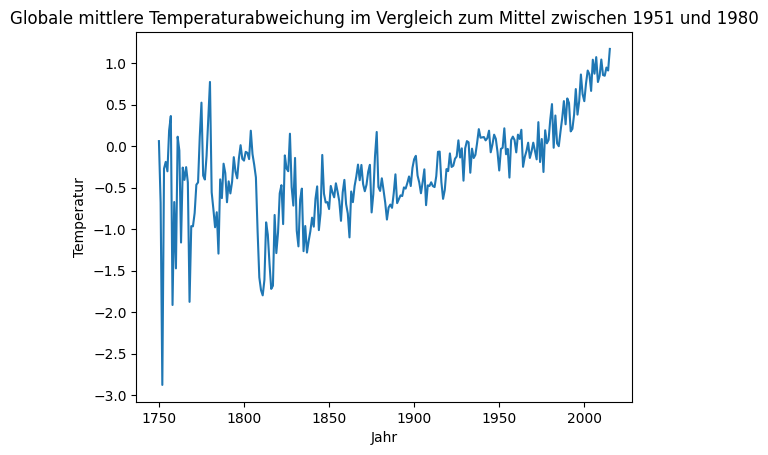

In [188]:
import matplotlib.pyplot as plt
import numpy as np

data_temperature = compute_global_mean_temperature(data)

first_year = min_col(data_temperature, 'Year')
mean_first = 1951-first_year
mean_last = 1980-first_year
corresponding = data_temperature['Mean Temperature'][mean_first:mean_last+1]
corresponding_mean = sum(corresponding) / len(corresponding)


plt.plot(data_temperature['Year'], np.array(data_temperature['Mean Temperature'])-corresponding_mean)

plt.title('Globale mittlere Temperaturabweichung im Vergleich zum Mittel zwischen 1951 und 1980')
plt.xlabel('Jahr')
plt.ylabel('Temperatur')

In [189]:
grader.check("q10")

q10 results: All test cases passed!
q10 - 1 message: Das sieht gut aus.

***

Im folgenden sehen Sie eine Möglichkeit wie wir die gleiche Darstellung mit ``Pandas`` erzeugen können.

In [ ]:
import pandas as pd

df = pd.read_csv('./data/GlobalTemperatures.csv')                                        # read data
df = df.dropna(subset=['LandAverageTemperature'])                                        # remove rows where there is no data for the temperature
df['Year'] = df['dt'].transform(lambda date: int(date.split('-')[0]))                    # add column for the year

mean = df[(df['Year'] >= 1750) & (df['Year'] <= 1951)]['LandAverageTemperature'].mean()  # compute the mean between 1750 and 1951

df = df.groupby(['Year']).mean()                                                         # compute the yearly mean

df['Temperaturabweichung'] = df['LandAverageTemperature'].transform(lambda x: x - mean)  # subtract the mean between 1750 and 1951

# plot it
df['Temperaturabweichung'].plot(ylabel='Temperatur', xlabel='Jahr', title= 'Globale mittlere Temperaturabweichung im Vergleich zum Mittel zwischen 1951 und 1980')

<AxesSubplot: title={'center': 'Globale mittlere Temperaturabweichung im Vergleich zum Mittel zwischen 1750 und 1951'}, xlabel='Jahr', ylabel='Temperaturabweichung'>

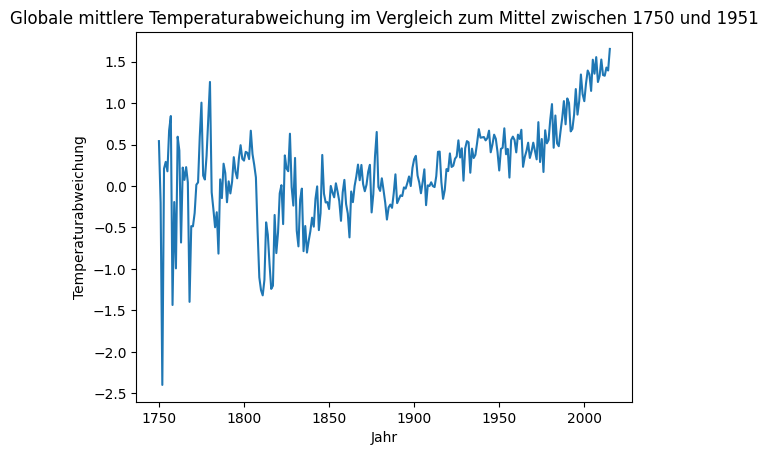

In [185]:
import pandas as pd

df = pd.read_csv('./data/GlobalTemperatures.csv')                                         # read data
df = df.dropna(subset=['LandAverageTemperature'])                                         # remove rows where there is no data for the temperature
df['dt'] = pd.to_datetime(df['dt'])                                                       # convert the 'dt' column to datetime objects
df['Year'] = df['dt'].dt.year                                                             # add column for the year using datetime properties

mean = df[(df['Year'] >= 1750) & (df['Year'] <= 1951)]['LandAverageTemperature'].mean()   # compute the mean between 1750 and 1951

df = df.groupby(['Year']).mean()                                                          # compute the yearly mean

df['Temperaturabweichung'] = df['LandAverageTemperature'] - mean                          # subtract the mean between 1750 and 1951

# plot it
df['Temperaturabweichung'].plot(ylabel='Temperaturabweichung', xlabel='Jahr', title= 'Globale mittlere Temperaturabweichung im Vergleich zum Mittel zwischen 1750 und 1951')

## Abgabe **Please save before exporting!**

Dieses Notebook ist eine **Abgabe**! Zur erfolgreichen Abgabe wird erwartet, dass Sie die Aufgabe in Moodle hochgeladen und mit Ihrem Praktikumsleiter durchgesprochen haben. Zum Hochladen in Moodle führen Sie alles von oben nach unten aus, speichern Sie Ihr Notebook und laden Sie die generierte .zip-Datei in Moodle hoch.

In [190]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)